<a href="https://colab.research.google.com/github/Renato-55/UtadinosHackerton/blob/main/Graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Renato-55/UtadinosHackerton

In [ ]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

#path to data
path = "/content/UtadinosHackerton/CO2 Emissions_Canada.csv"

#Load Data
df = pd.read_csv(path)

In [4]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
renamed_col = {
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_col, axis='columns', inplace=True)

In [6]:
tf

<module 'tensorflow' from '/usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py'>

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
mpgfuel_cons_comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots

In [9]:
df.Make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

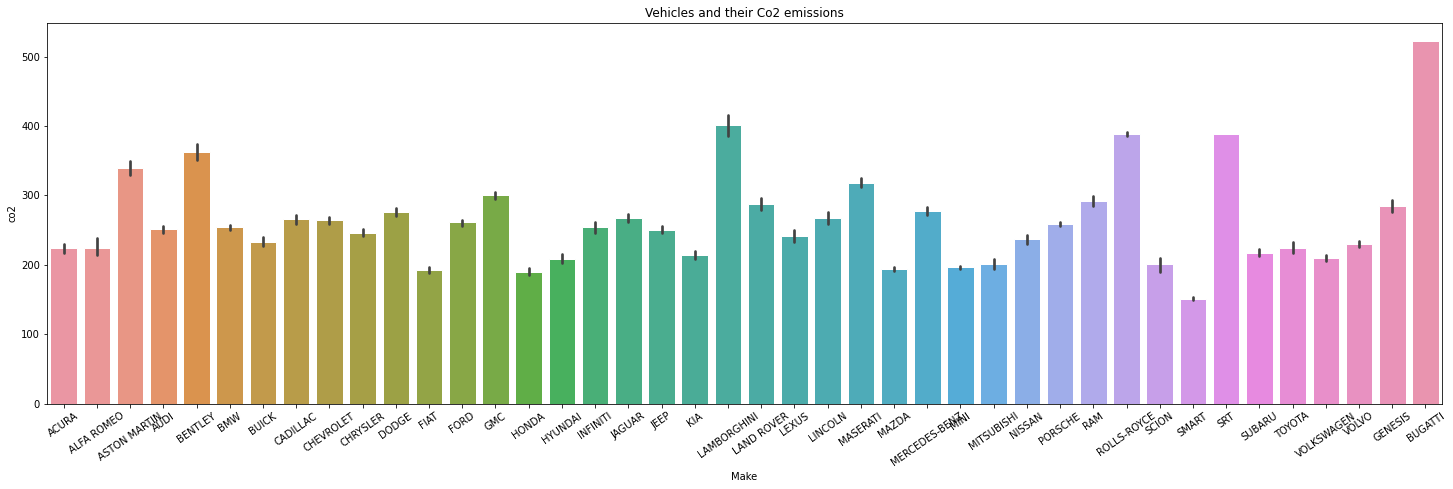

In [10]:
f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="darkgrid")

x = df.Make.value_counts().sort_values()

ax = sns.barplot(data=df,x='Make',y='co2')
plt.title('Vehicles and their Co2 emissions')
plt.xticks(rotation=35)
plt.show()

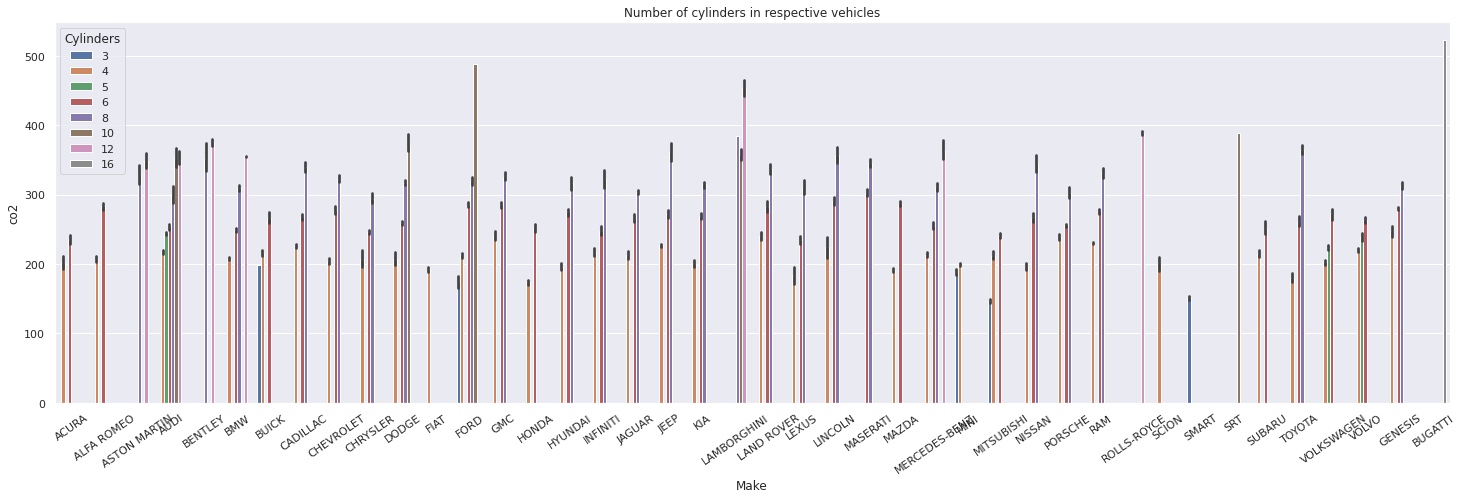

In [11]:
f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="darkgrid")

x = df.Make.value_counts().sort_values()

ax = sns.barplot(data=df,x='Make',y='co2', hue='Cylinders')
plt.title('Number of cylinders in respective vehicles')
plt.xticks(rotation=35)
plt.show()


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [13]:
copia = df.copy

In [14]:
s = StandardScaler()

In [15]:
mlr = LinearRegression()
y = df['co2']
X = df[['engine_size', 'Cylinders', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb', 'mpgfuel_cons_comb']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018) #split into train and test parts
X_train_sm = s.fit_transform(X_train)
mlr.fit(X_train_sm, y_train)
X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

mlr = LinearRegression()
y = df['co2']
X = df[['engine_size', 'Cylinders', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb', 'mpgfuel_cons_comb']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018) #split into train and test parts
X_train_sm = s.fit_transform(X_train)
mlr.fit(X_train_sm, y_train)
X_test_sm = s.transform(X_test)
y_pred_sm = mlr.predict(X_test_sm)


      engine_size  Cylinders  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb  \
5837          2.5          4            11.3            9.4            10.5   
1024          2.5          5            11.2            7.7             9.6   
4863          1.5          4             8.4            6.2             7.4   
1132          4.2          8            14.8           10.6            12.9   
1668          2.4          4            11.3            8.3            10.0   

      mpgfuel_cons_comb  
5837                 27  
1024                 29  
4863                 38  
1132                 22  
1668                 28  


AttributeError: ignored

In [17]:
#Accuracy and MSE
print(f'R2 score is {r2_score(y_pred_sm,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred_sm - y_test) ** 2))

R2 score is 0.8894270730306655
Residual sum of squares (MSE): 336.03


In [18]:
mean_emission = np.mean(y)

class Carro:

  def init(self):
    self.marca = "Renault"
    self.modelo = "Megane"
    self.tamMotor = 2
    self.numCilindros = 4
    self.tipoCombustivel = "Gasoleo"
    self.mediaMotorCity = 7
    self.mediaMotorHwy = 6
    self.mediaMotorComb = self.mediaMotorCity*0.55 + self.mediaMotorCity*0.45
    self.mediaMotorCombMpg = self.mediaMotorComb*6.534
    #valor target default

  def lerDados(self):
    self.marca = input("Type the car Make: ")
    self.modelo = input("Type the car Model: ")
    self.tamMotor = int(input("Type the motor size: "))
    self.numCilindros = int(input("Type the num of cilinders: "))
    self.tipoCombustivel = input("Type the type of fuel (X - Gasoline) (Z - diesel)(D- eletric)")
    self.mediaMotorCity=float(input("Type the avarege consumption of fuel driving in the city per 100km :"))
    self.mediaMotorHwy=float(input("Type the avarege consumption of fuel driving in the highway per 100km :"))
    self.mediaMotorComb = self.mediaMotorCity*0.55 + self.mediaMotorCity*0.45
    self.mediaMotorCombMpg = self.mediaMotorComb*6.534

  def predict(self,model):

    #one = np.array( [  self.numCilindros,  self.mediaMotorCity,self.mediaMotorHwy,
    #                   self.mediaMotorComb,self.mediaMotorCombMpg, self.consumoCombinado])

    one = tf.constant( [[  self.tamMotor, self.numCilindros,  self.mediaMotorCity,self.mediaMotorHwy,
                       self.mediaMotorComb,self.mediaMotorCombMpg]])

    predicted_emission = model.predict(one)
    print(f"Is Expected to the car {self.marca} has an co2 (g/km) emission of {predicted_emission}\n")


    dif = predicted_emission- y.mean()[0] 
    if(dif > 0):
      print(f"Compared to the known models, your car is {abs(dif)} c02 (g/km) horse.\n")
    elif(dif <= 0):
      print(f"Compared to the known models, your car is {abs(dif)} c02 (g/km) better.\n")



c = Carro()
#Carro.lerDados(c)
Carro.predict(c,model)

NameError: ignored